In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("happiest-countries-in-the-world-2024-updated.csv")

In [3]:
df.head()

,country,HappiestCountriesWorldHappinessReportRankings2024,HappiestCountriesWorldHappinessReportScore2024
0,Finland,1.0,7.74
1,Denmark,2.0,7.58
2,Iceland,3.0,7.53
3,Sweden,4.0,7.34
4,Israel,5.0,7.34


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 3 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   country                                            145 non-null    object 
 1   HappiestCountriesWorldHappinessReportRankings2024  141 non-null    float64
 2   HappiestCountriesWorldHappinessReportScore2024     141 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB
None


**Checking missing values**

In [5]:
df.isnull().sum()

,0
country,0
HappiestCountriesWorldHappinessReportRankings2024,4
HappiestCountriesWorldHappinessReportScore2024,4


**Summary**

In [6]:
df.describe()

,HappiestCountriesWorldHappinessReportRankings2024,HappiestCountriesWorldHappinessReportScore2024
count,141.000000,141.000000
mean,72.276596,5.519504
std,41.558583,1.175487
min,1.000000,1.720000
25%,37.000000,4.660000
50%,72.000000,5.790000
75%,108.000000,6.410000
max,143.000000,7.740000


***Data Cleaning***

**Rename column for easier access**

*   inplace=True, Modifies the DataFrame directly without returning a new DataFrame.
*   The rename() method itself does not print anything to the screen.


In [7]:
df.rename(columns={'country': 'Country', 'HappiestCountriesWorldHappinessReportScore2024': 'Happiness_Score' , 'HappiestCountriesWorldHappinessReportRankings2024': 'Happiness_Ranking'}, inplace=True)

Need to use print(df) or df.head() to verify the changes after renaming.

In [8]:
df_renamed = df.rename(columns={'country': 'Country', 'HappiestCountriesWorldHappinessReportScore2024': 'Happiness_Score' , 'HappiestCountriesWorldHappinessReportRankings2024': 'Happiness_Ranking'})
print(df_renamed)

          Country  Happiness_Ranking  Happiness_Score
0         Finland                1.0             7.74
1         Denmark                2.0             7.58
2         Iceland                3.0             7.53
3          Sweden                4.0             7.34
4          Israel                5.0             7.34
..            ...                ...              ...
140   Afghanistan              143.0             1.72
141  Turkmenistan                NaN              NaN
142        Rwanda                NaN              NaN
143    Kyrgyzstan                NaN              NaN
144       Belarus                NaN              NaN

[145 rows x 3 columns]


**Dropping rows with missing values**

In [11]:
df_reset1 = df.dropna(inplace=True)
print(df_reset1)

None


**Dropping unnecessary columns**

In [10]:
df.drop(columns=['Unnamed:0'], inplace=True, errors='ignore')

***Analyzing Data***

**Top 10 happiest countries**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df['Happiness_Score'] = pd.to_numeric(df['Happiness_Score'], errors='coerce')
print(df['Happiness_Score'].isnull().sum())
top_10 = df.nlargest(10, 'Happiness_Score')
print(top_10)

0
       Country  Happiness_Ranking  Happiness_Score
0      Finland                1.0             7.74
1      Denmark                2.0             7.58
2      Iceland                3.0             7.53
3       Sweden                4.0             7.34
4       Israel                5.0             7.34
5  Netherlands                6.0             7.32
6       Norway                7.0             7.30
7   Luxembourg                8.0             7.12
8  Switzerland                9.0             7.06
9    Australia               10.0             7.06


**Avaragr happiness score by country**

In [13]:
if 'Country' in df.columns:
    avg_happiness_by_country = df.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False)
    print(avg_happiness_by_country)

Country
Finland         7.74
Denmark         7.58
Iceland         7.53
Israel          7.34
Sweden          7.34
                ... 
DR Congo        3.30
Sierra Leone    3.25
Lesotho         3.19
Lebanon         2.71
Afghanistan     1.72
Name: Happiness_Score, Length: 141, dtype: float64


**Correlation between happiness score and other factors**

In [23]:
df['Happiness_Ranking'] = pd.to_numeric(df['Happiness_Ranking'], errors='coerce')
# Selecting only numerical features for correlation
numerical_features = df.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix['Happiness_Score'].sort_values(ascending=False))

Happiness_Score      1.00000
Happiness_Ranking   -0.97717
Name: Happiness_Score, dtype: float64


***Visualizing the Data***

**Bar Plot of top 10 happiest countries**

<ipython-input-26-607a3d351a68>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness_Score', y='Country', data=top_10, palette='plasma')


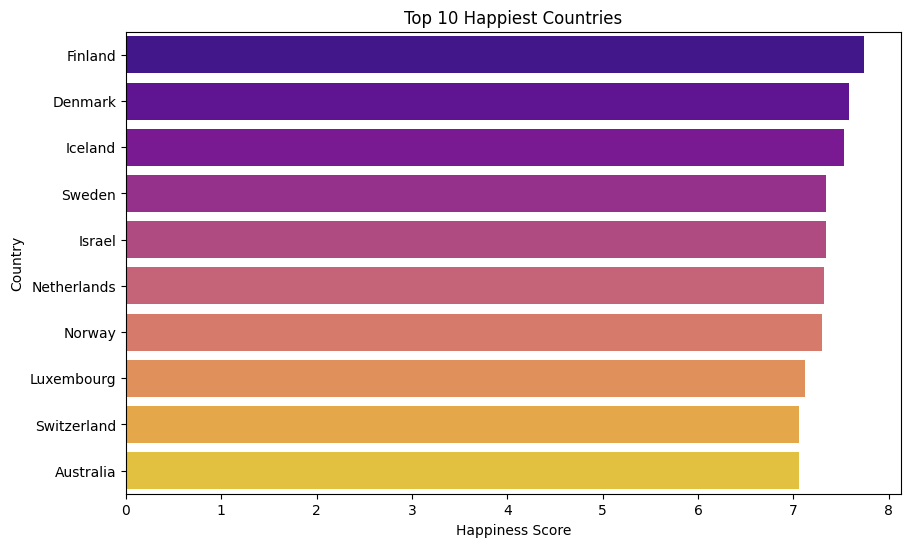

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Happiness_Score', y='Country', data=top_10, palette='plasma')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

**Heatmap of coorelation matrix**

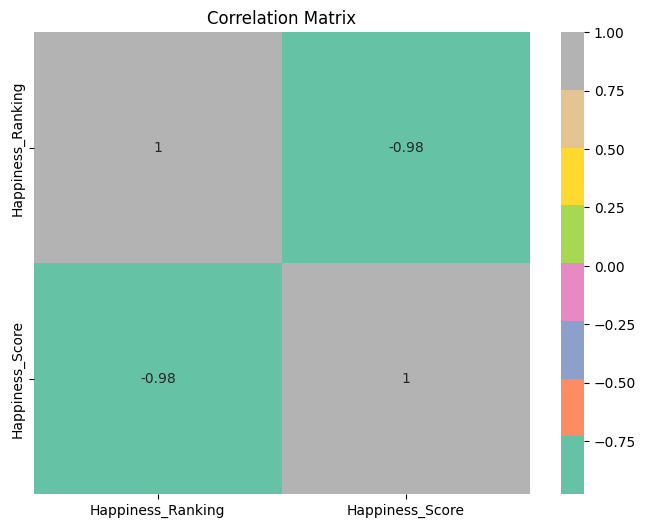

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Set2')
plt.title('Correlation Matrix')
plt.show()

**Box plot of happiness score by country**

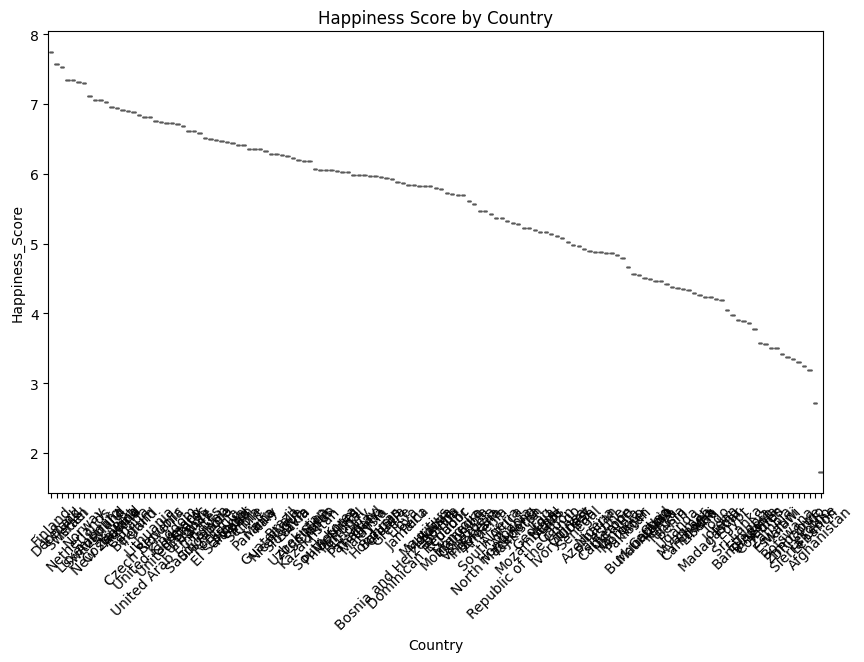

In [35]:
if 'Country' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y='Happiness_Score', data=df, hue='Country', palette='skyblue', legend=False)
    plt.xticks(rotation=45)
    plt.title('Happiness Score by Country')
    plt.show()

**Saving cleaned dataset**

In [36]:
df.to_csv('cleaned_happiness_data.csv', index=False)

**Saving top 10 countries**

In [37]:
top_10.to_csv('top_10_happiest_countries.csv', index=False)